In [21]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [14]:
(x_train_full,y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train_full.shape

(60000, 28, 28)

In [5]:
x_val, x_train = x_train_full[:5000],x_train_full[5000:]/255
y_val, y_train = y_train_full[:5000],y_train_full[5000:]


In [6]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
        0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470588,
        0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
        0.96862745, 1.    

In [7]:
model = keras.models.Sequential() # empty model created
model.add(keras.layers.Flatten(input_shape = [28,28])) #adding the input size (as our data set is 28*28 pixels)
model.add(keras.layers.Dense(300, activation = 'relu'))#hidden layer
model.add(keras.layers.Dense(100, activation = 'relu'))#hidden layer
model.add(keras.layers.Dense(10, activation = 'softmax')) #kind of output layer

/opt/miniconda3/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [13]:
model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer="sgd", metrics=['Accuracy'])

In [19]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_val,y_val))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 534us/step - Accuracy: 0.9204 - loss: 0.2241 - val_Accuracy: 0.8532 - val_loss: 63.9027
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 527us/step - Accuracy: 0.9222 - loss: 0.2197 - val_Accuracy: 0.8484 - val_loss: 69.0290
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 520us/step - Accuracy: 0.9234 - loss: 0.2163 - val_Accuracy: 0.8668 - val_loss: 56.0323
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 516us/step - Accuracy: 0.9240 - loss: 0.2124 - val_Accuracy: 0.8318 - val_loss: 78.7915
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 528us/step - Accuracy: 0.9241 - loss: 0.2097 - val_Accuracy: 0.8682 - val_loss: 57.5680
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 517us/step - Accuracy: 0.9265 - loss: 0.2050 - val_Accuracy: 0.8500 - val_loss: 72.0464
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 531us/step - Accuracy: 0.9279 - loss: 0.2035 - val_Accuracy: 0.8544 - val_loss: 66.9399
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 527us/step - Accuracy: 0

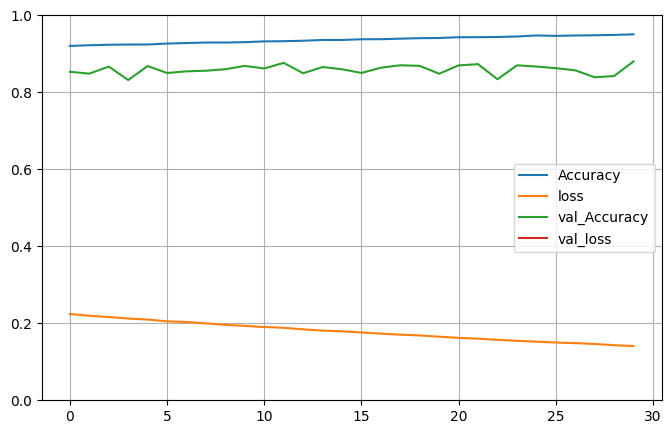

In [22]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [23]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - Accuracy: 0.8696 - loss: 59.9720


[59.97199249267578, 0.8695999979972839]